In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tqdm.notebook import tqdm
%matplotlib inline

In [140]:
metadata = pd.read_csv('metadata.csv')
train_labels = pd.read_csv('train_labels.csv')
metadata.head()

,sample_id,split,derivatized,features_path,features_md5_hash
0,S0000,train,NaN,train_features/S0000.csv,52ec6d6f8372500ab4e069b5fbdae6f9
1,S0001,train,NaN,train_features/S0001.csv,348f90baed8a8189bf0d4c7b9ed9f965
2,S0002,train,1.0,train_features/S0002.csv,4686ad9bc3716966f63b6ff83d1d8324
3,S0003,train,NaN,train_features/S0003.csv,de6b53605c5887967dc3661a3a711c2b
4,S0004,train,NaN,train_features/S0004.csv,fbfd90092d10d15a5d6919327ddde2ab


In [142]:
def metadata_parser(metadata):
    train_dict = {}
    val_dict = {}
    for row in metadata.iterrows():
        if row[1].split == 'train':
            train_dict[row[1].sample_id] = row[1].features_path
        else:
            val_dict[row[1].sample_id] = row[1].features_path
    return train_dict, val_dict

def train_label_parser(train_labels):
    train_labels_dict = {}
    for row in train_labels.iterrows():
        row_list = list(row[1])
        train_labels_dict[row_list[0]] = row_list[1:]
    columns = list(train_labels.columns)
    return train_labels_dict, columns[1:]

train_path, val_path = metadata_parser(metadata)
train_labels_dict, labels = train_label_parser(train_labels)

def get_ids_per_class():
    ids_per_class = {}
    for class_name in labels:
        index = labels.index(class_name)
        ids = []
        for key, value in train_labels_dict.items():
            if value[index] == 1:
                ids.append(key)
        ids_per_class[class_name] = ids
    return ids_per_class

def find_absolute_maximum_mass():
    print("Finding absolute maximum mass")
    pb = tqdm(total=len(train_path) + len(val_path))
    absolute_max = 0
    for key, value in train_path.items():
        pb.update(1)
        data = pd.read_csv(value)
        data.sort_values('mass')
        max_mass = data['mass'].max()
        absolute_max = max(absolute_max, max_mass)
    
    for key, value in val_path.items():
        pb.update(1)
        data = pd.read_csv(value)
        data.sort_values('mass')
        max_mass = data['mass'].max()
        absolute_max = max(absolute_max, max_mass)
    
    return absolute_max


ids_per_class = get_ids_per_class()
# absolute_maximum_mass = find_absolute_maximum_mass()   Already found
absolute_maximum_mass = 649.96228 
print("ALl labels:", labels)
print("Maximum mass:", absolute_maximum_mass)

Finding absolute maximum mass


  0%|          | 0/1121 [00:00<?, ?it/s]

ALl labels: ['aromatic', 'hydrocarbon', 'carboxylic_acid', 'nitrogen_bearing_compound', 'chlorine_bearing_compound', 'sulfur_bearing_compound', 'alcohol', 'other_oxygen_bearing_compound', 'mineral']
Maximum mass: 649.96228


In [133]:
def train_data_parser(id):
    path = train_path[id]
    data = pd.read_csv(path)
    data.sort_values('mass')
    labels = list(data.columns)
    data = {
        'time': np.array(data.time),
        'mass': np.array(data.mass),
        'intensity': np.array(data.intensity),
    }
    return data


def peak_intensity_plotter(sample_id, number_of_peaks, width):
    data = train_data_parser(sample_id)
    plt.figure(figsize=(20, 10))
    indices = find_peaks(data['intensity'], width=width)[0]
    sorted_peaks = sorted(indices, key=lambda x: data['intensity'][x], reverse=True)
    filtered_indices = sorted_peaks[:number_of_peaks]
    plt.plot(data['mass'], data['intensity'])
    plt.plot(data['mass'][filtered_indices], 
             data['intensity'][filtered_indices], 
             'x', color='red')
    plt.xlim(0, 650)
    plt.savefig('peak_intensity_plot.png', bbox_inches='tight')
    return indices

array([   348,   1902,   2519,   4855,   5967,   6245,   6318,   6399,
         7746,   9894,  10881,  11943,  22882,  25014,  26642,  29088,
        33160,  33460,  35658,  41228,  44671,  44900,  50114,  55769,
        55920,  58113,  58547,  58608,  62052,  63266,  65763,  74068,
        75774,  77893,  78729,  79244,  79630,  80791,  82101,  82452,
        83329,  84305,  85035,  86327,  87161,  89111,  89429,  90165,
        90690,  97401,  97820,  98266,  98529,  99017, 100806, 102411,
       102934, 104639, 109138, 111299, 111960, 113565, 124107, 125120,
       125290, 127129, 127778, 129910, 131651, 133796, 137360, 149031,
       149050, 149188, 149846, 151244, 152597, 153645, 154149, 156509,
       159190, 161166, 162645, 164487, 169918, 172211, 173796, 176361,
       176571, 177704, 177936, 178914, 179417, 180654, 181288, 184318,
       185484], dtype=int64)

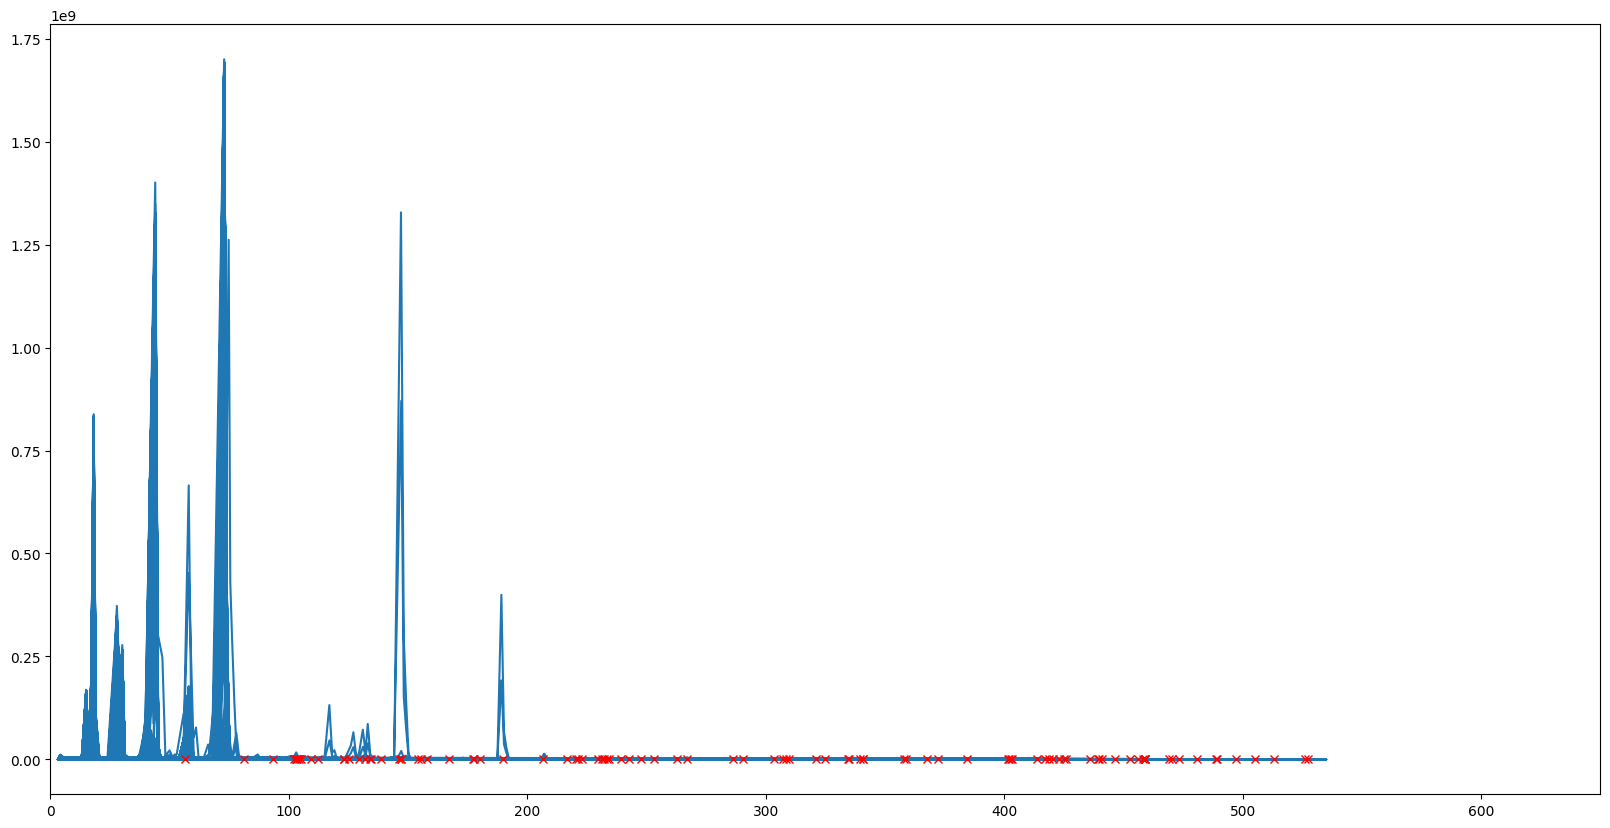

In [134]:
peak_intensity_plotter('S0000', 100, 5)

  0%|          | 0/809 [00:00<?, ?it/s]

KeyboardInterrupt: 